# SGD with a Roller Coaster

Practice Session --> Trying to do this blindly, without checking things in the book. Looking up docs is fair game.

Goal: Use pytorch to calculate gradients on a quadratic equation and do gradient descent to optimize fit with a hypothetical roller coaster's speed over a hill.

## Generate hypothetical Roller Coaster data

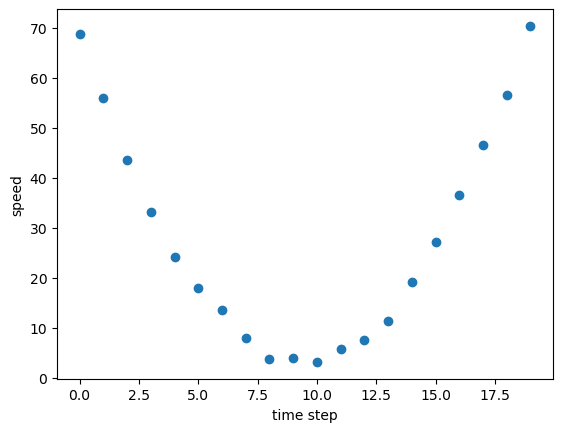

In [20]:
import torch
import matplotlib.pyplot as plt

time = torch.arange(0, 20)
# cheated here, looked up this speed equation
speed = torch.rand(20)*5 + 0.75*(time-9.5)**2 + 1

fig, ax = plt.subplots()
ax.scatter(time, speed)
ax.set_xlabel('time step')
ax.set_ylabel('speed')

plt.show()

## Create Quadratic Function, Splitting Time Input and Coefficients

In [21]:
def quad(time, params):
    a,b,c = params
    return a*(time**2) + b*time + c

tensor([0.6787, 0.2448, 0.3918], requires_grad=True)
tensor([  0.3918,   1.3152,   3.5959,   7.2340,  12.2293,  18.5820,  26.2920,
         35.3592,  45.7838,  57.5657,  70.7050,  85.2015, 101.0553, 118.2664,
        136.8349, 156.7607, 178.0437, 200.6841, 224.6818, 250.0368],
       grad_fn=<AddBackward0>)


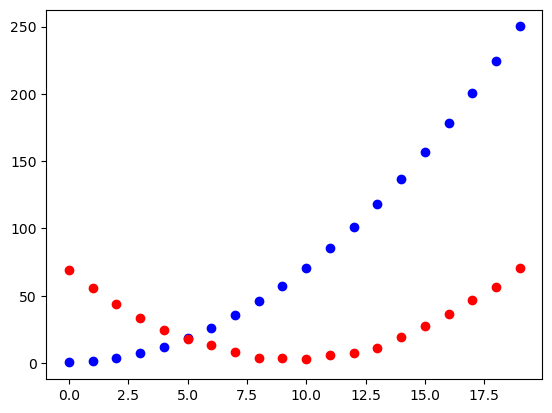

In [22]:
params = torch.rand(3, requires_grad=True) # I don't think this is how the book required grad.
# params = torch.rand(3).requires_grad_() # <-- This is the book way, had to look up trying to figure out the "can't call numpy on variable that requires grad" error.
preds = quad(time, params)
print(params)
print(preds)

predsDupe = preds.detach().numpy()

fig, ax = plt.subplots()
ax.scatter(time, preds.detach().numpy(), color='blue')
ax.scatter(time, speed, color='red')
plt.show()

## Calculate The Cost

In [23]:
def MSE(preds, actuals):
    # return (preds-actuals).square().mean().sqrt()
    return ((preds-actuals)**2).mean().sqrt()

cost = MSE(preds, speed)
cost

tensor(95.3237, grad_fn=<SqrtBackward0>)

## Get The Gradient And Do One Step

In [24]:
# This is where I got lost, didn't remember how the gradients were calculated / what calls to make.
# I had the below backward call correct, but didn't remember that I get the gradients from the params tensor.
# ...seems obvious now, of course. :)

cost.backward()

lr = 0.0001
params.data -= lr*params.grad.data
print(params.data)
params.grad = None

tensor([0.6625, 0.2437, 0.3917])


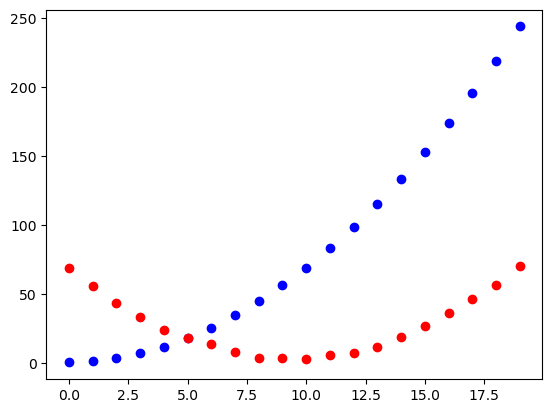

In [25]:
def plotthethings(time, preds, speed):
    fig, ax = plt.subplots()
    ax.scatter(time, preds.detach().numpy(), color='blue')
    ax.scatter(time, speed, color='red')
    plt.show()
    
plotthethings(time, quad(time, params), speed)

In [26]:
def stepOnce(params, lr=0.001, plt=True, pnt=False):
    preds = quad(time, params)
    if plt: plotthethings(time, preds, speed)
    cost = MSE(preds, speed)
    if pnt: print(cost)
    cost.backward()
    params.data -= lr*params.grad.data
    params.grad = None
    return params, cost.data

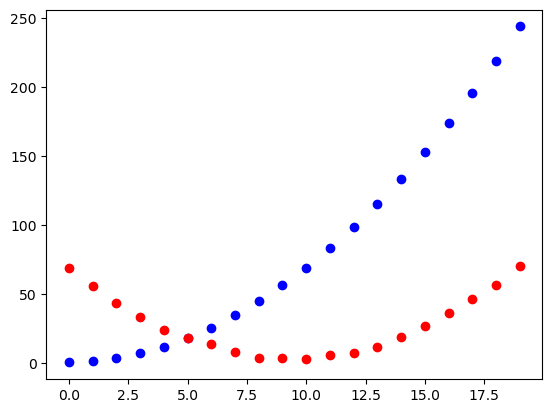

tensor(92.6968, grad_fn=<SqrtBackward0>)


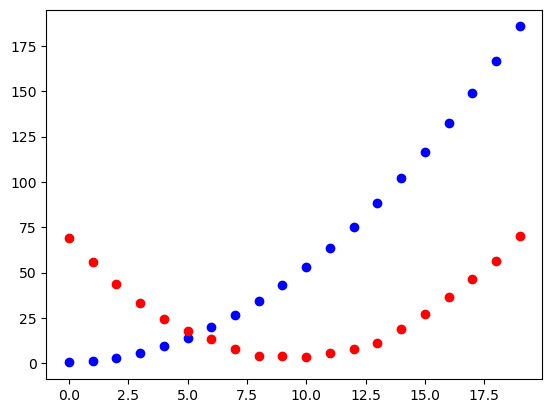

tensor(66.9170, grad_fn=<SqrtBackward0>)


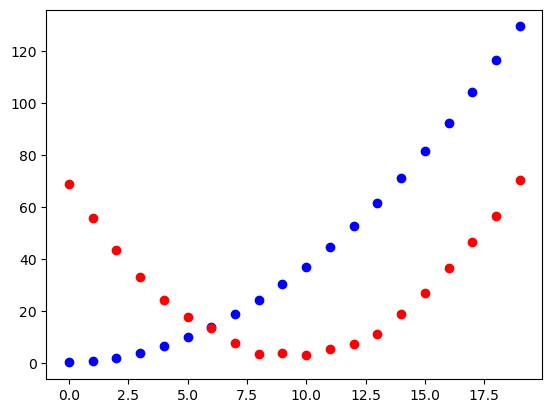

tensor(43.7434, grad_fn=<SqrtBackward0>)


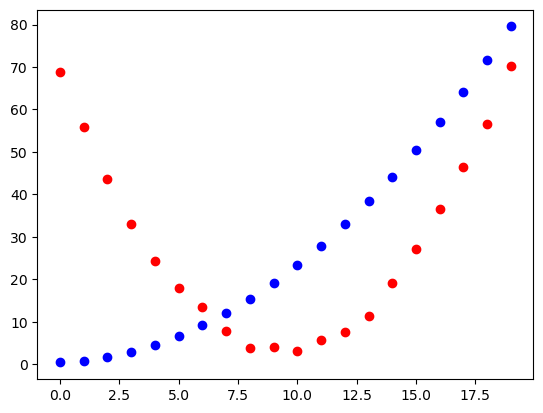

tensor(28.0943, grad_fn=<SqrtBackward0>)


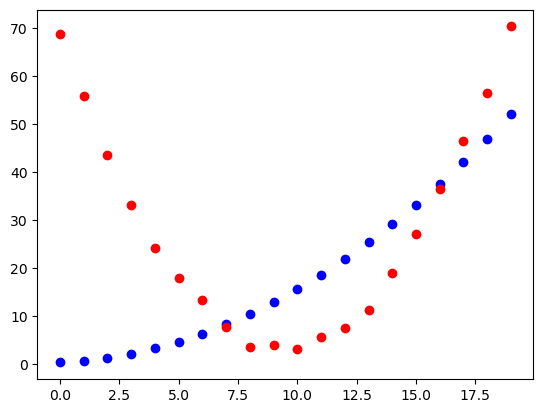

tensor(25.0603, grad_fn=<SqrtBackward0>)


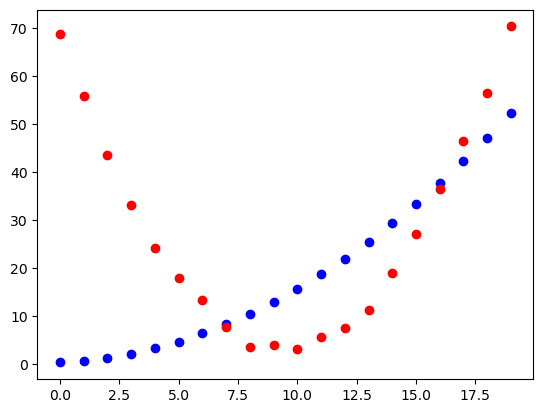

tensor(25.0601, grad_fn=<SqrtBackward0>)


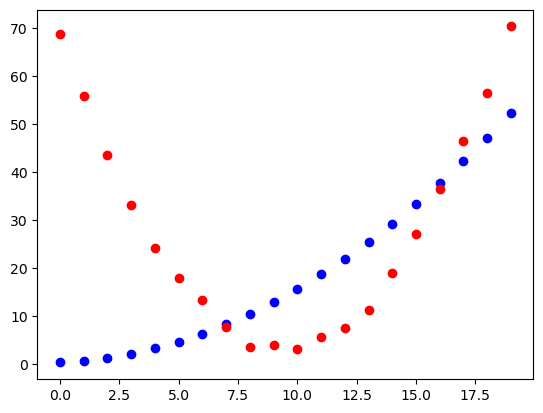

tensor(25.0600, grad_fn=<SqrtBackward0>)


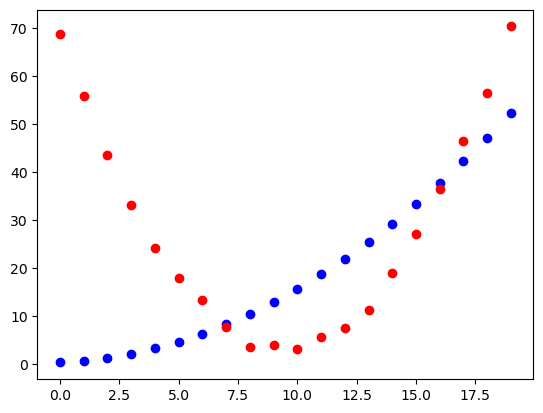

tensor(25.0598, grad_fn=<SqrtBackward0>)


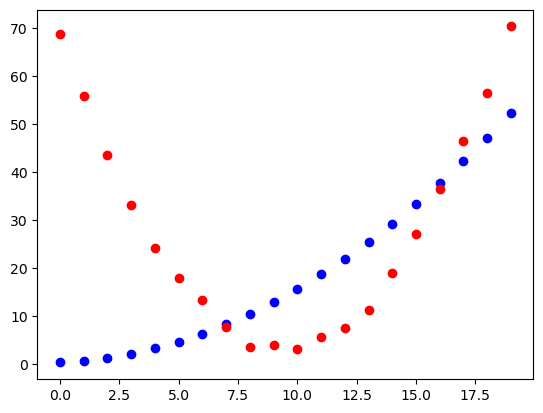

tensor(25.0597, grad_fn=<SqrtBackward0>)


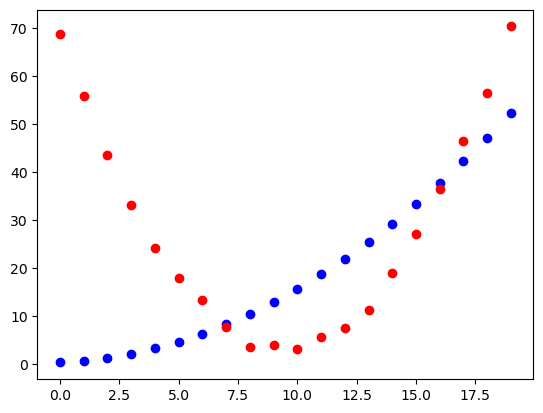

tensor(25.0596, grad_fn=<SqrtBackward0>)


In [27]:
allCost = []

for i in range(10):
    params, costData = stepOnce(params, plt=True, pnt=True)
    allCost.append(costData)

I experimented for a bit here with the learning rate. In the end, it took a huge number of iterations to start to approach the original quadratic. Time to move on...